In [13]:
from inverse_modelling_tfo.models import train_model, create_perceptron_model
from inverse_modelling_tfo.data import generate_data_loaders
from torch.optim import Adam, SGD
import torch.nn as nn
import matplotlib.pyplot as plt

In [20]:
# Example Code
params = {
    'batch_size': 500, 'shuffle': False, 'num_workers': 2
}
train, val = generate_data_loaders(params)
model = create_perceptron_model()
print(model)


Sequential(
  (0): Linear(in_features=6, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=2, bias=True)
  (5): ReLU()
  (6): Linear(in_features=2, out_features=1, bias=True)
  (7): Flatten(start_dim=1, end_dim=-1)
)


In [21]:
criterion = nn.MSELoss()
# optimizer = Adam(model.parameters(), lr=0.001)
optimizer = SGD(model.parameters(), lr=0.0005, momentum=0.9)


In [24]:
train_loss, validation_loss = train_model(model, optimizer, criterion, train, val, epochs=5)

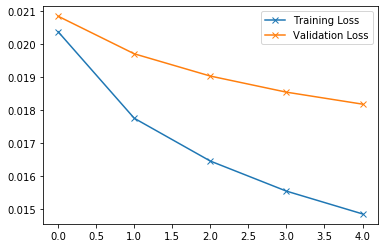

In [25]:
plt.figure()
plt.plot(train_loss, label='Training Loss', marker='x')
plt.plot(validation_loss, label='Validation Loss', marker='x')
plt.legend()